# Q1-(a)

In [183]:
import cv2
import os
import pandas as pd 

# import female data
image = os.listdir(r'C:/Users/x5134/Desktop/HW03/ORL_Faces/female') # 讀取檔案資料
img_female = []
for i in range(len(image)):
    os.chdir(r'C:/Users/x5134/Desktop/HW03/ORL_Faces/female') # 鎖定檔案
    img = cv2.imread(image[i], cv2.IMREAD_GRAYSCALE)          # 讀取圖檔
    irow = img.ravel()                                        # 轉為1維陣列 
    img_female += [irow]                                      # 將所有圖片一維陣列儲存在一個集合    
female = pd.DataFrame(img_female)                             # 輸出成資料框並命名
female['label'] = 0                                           # add label

# import male data
image = os.listdir(r'C:/Users/x5134/Desktop/HW03/ORL_Faces/male') # 讀取檔案資料
img_male = []
for i in range(len(image)):
    os.chdir(r'C:/Users/x5134/Desktop/HW03/ORL_Faces/male')   # 鎖定檔案
    img = cv2.imread(image[i], cv2.IMREAD_GRAYSCALE)          # 讀取圖檔
    irow = img.ravel()                                        # 轉為1維陣列
    img_male += [irow]                                        # 將所有圖片一維陣列儲存在一個集合
male = pd.DataFrame(img_male)                                 # 輸出成資料框並命名
male['label'] = 1                                             # add label

# concat two data
total = pd.concat([female,male], axis = 0, join = 'inner') # concat female and male data
total.index = range(0,400)                                 # rename index
total = (total.drop(['label'], axis = 1))                  # drop label, let shape become (400, 2576)

total_labels = pd.concat([female['label'], male['label']], axis = 0,join = 'inner') # concat label
total_labels.index = range(0,400)

# Q1-(b)

In [184]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(total, total_labels)
print('coefficient =', model.coef_)
print('intercept =', model.intercept_)
print('參數數量(不含截距)有', len(model.coef_), '個')
print('R squared =', model.score(total, total_labels))
print('adjusted R squared =', 1 - (1-model.score(total, total_labels))*(len(total_labels)-1)/(len(total_labels)-total.shape[1]-1))

coefficient = [-2.76035507e-05 -1.53724303e-05 -2.58647810e-05 ... -1.08714267e-04
 -1.91769856e-04 -1.31911758e-04]
intercept = 1.0704191091957753
參數數量(不含截距)有 2576 個
R squared = 1.0
adjusted R squared = 1.0


# Q1-(c)

找到了 636 個最重要的參數


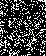

In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import numpy as np

# use stepwise selection from null model to find the important pixel
lr = LinearRegression()
sfs = SFS(lr, k_features = 'best', forward = True, scoring = 'neg_mean_squared_error',cv = 0)
sfs = sfs.fit(total, total_labels)

a = list(sfs.k_feature_names_)         # important pixel finded from null model
print('找到了',len(a),'個最重要的參數')  # print the number of important pixel
# print(sfs.k_feature_names_)          

# let important pixel to be white
pixel = [0] * 2576
for i in a:
    pixel[i] = 255     

# plot the chosen pixel on a 46x56 canvas
from PIL import Image
pic = np.array(pixel, dtype = 'uint8').reshape(56,46)
img = Image.fromarray(pic, 'L')
img

# Q2

In [179]:
import random
volcano = pd.read_csv(r'C:/Users/x5134/Desktop/HW03/Volcano.csv', names = list(range(1, 88)))
volcano.index = range(61, 0, -1)

# initial position
x = 87
y = 1
current_position_hight = volcano.at[y, x]

plot_x = []
plot_y = []
for i in range(10000):
    # print('%d the altitude is %d at [%d, %d]'% (i, current_position_hight, x, y))
    step = i 

    # 分別朝 X, Y 方向個走一步，並記錄高度較高的那個
    if current_position_hight > volcano.at[y+1, x] and current_position_hight > volcano.at[y, x-1]:
        break

    elif volcano.at[y+1, x] > volcano.at[y, x-1] and volcano.at[y+1, x] > current_position_hight:
        current_position_hight = volcano.at[y+1, x]
        y = y + 1

    elif volcano.at[y+1, x] < volcano.at[y, x - 1] and volcano.at[y, x - 1] > volcano.at[y, x]:
        current_position_hight = volcano.at[y, x - 1]
        x = x - 1

    # 如果兩邊高度一樣，就隨便選一邊走
    else:
        rnd = random.randint(0, 1)
        if rnd == 1:
            current_position_hight = volcano.at[y, x-1]
            x = x - 1
        else:
            current_position_hight = volcano.at[y+1, x]
            y = y + 1
    
print('step = %d。the highest altitude is %d at [%d, %d]'% (step, current_position_hight, x, y))

step = 76。the highest altitude is 170 at [48, 38]


#   Q3-(a)

In [201]:
import numpy as np

# 隨機產生一組資料
x1 = 0.2 + np.random.rand(50000) * 0.8
x2 = 1 - np.random.rand(50000) * 0.9
y = 6 + 1.5 * x1 - 4 * x2 + np.random.randn(50000)

x1 = pd.DataFrame(x1)
x2 = pd.DataFrame(x2)
y = pd.DataFrame(y)
total_x = pd.concat([x1, x2], axis=1)

model = LinearRegression()
model.fit(total_x, y)
print('intercept =', model.intercept_)
print('coefficient =', model.coef_)
print('R squared =', model.score(total_x, y))
print('adjusted R squared =', 1 - (1-model.score(total_x, y))*(len(y)-1)/(len(y)-total_x.shape[1]-1))

intercept = [6.0105622]
coefficient = [[ 1.48279297 -3.99534408]]
R squared = 0.5435474382086332
adjusted R squared = 0.5435291790106096


# Q3-(b)

In [215]:
def gradient_descent(initial_position, iteration, learning_rate, sample_interval):

    # 防呆。防止迭代次數比紀錄點少
    if iteration < sample_interval:
        sample_interval = iteration

    # input initial position
    b0 = initial_position[0]
    b1 = initial_position[1]
    b2 = initial_position[2]

    for i in range(iteration):
        y_hat = b0 + b1 * x1 + b2 * x2
        e = y - y_hat
        b0 = b0 - learning_rate*(-e.sum())
        b1 = b1 - learning_rate*(-(e*x1).sum())
        b2 = b2 - learning_rate*(-(e*x2).sum())

        # record point
        if (i + 1) % sample_interval == 0:
            print('iteration = %d, e = %.3f,  [b0, b1, b2] = [%.3f, %.3f, %.3f]' % ((i+1), e.sum(), b0, b1, b2))

# 隨機初始化位置
b0 = random.randint(-1000,1000)
b1 = random.randint(-1000,1000)
b2 = random.randint(-1000,1000)

# start training
gradient_descent(initial_position = [b0, b1, b2], iteration = 500, learning_rate = 0.00001, sample_interval = 50)

iteration = 50, e = 18322.229,  [b0, b1, b2] = [-1.010, -14.135, 25.217]
iteration = 100, e = 4869.452,  [b0, b1, b2] = [3.951, -1.031, 2.339]
iteration = 150, e = 1467.427,  [b0, b1, b2] = [5.337, 1.270, -2.578]
iteration = 200, e = 498.932,  [b0, b1, b2] = [5.777, 1.577, -3.680]
iteration = 250, e = 186.011,  [b0, b1, b2] = [5.933, 1.569, -3.944]
iteration = 300, e = 73.537,  [b0, b1, b2] = [5.993, 1.538, -4.015]
iteration = 350, e = 30.049,  [b0, b1, b2] = [6.017, 1.519, -4.036]
iteration = 400, e = 12.494,  [b0, b1, b2] = [6.027, 1.510, -4.044]
iteration = 450, e = 5.240,  [b0, b1, b2] = [6.031, 1.505, -4.046]
iteration = 500, e = 2.208,  [b0, b1, b2] = [6.033, 1.504, -4.047]
